In [238]:
import numpy as np
import pandas as pd

file = pd.read_csv('spam.csv',encoding='ISO-8859-1')
file.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2853,ham,Haha... Hope Ì_ can hear the receipt sound... ...,NaN,NaN,NaN
2499,ham,Yup i've finished c Ì_ there...,NaN,NaN,NaN
345,ham,Gudnite....tc...practice going on,NaN,NaN,NaN
4283,ham,Yes. I come to nyc for audiitions and am tryin...,NaN,NaN,NaN
3564,ham,We know TAJ MAHAL as symbol of love. But the o...,NaN,NaN,NaN


In [239]:
file.shape

(5572, 5)

In [240]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [241]:
file.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [242]:
file.sample(5)

,v1,v2
3387,ham,Same as kallis dismissial in 2nd test:-).
1846,ham,Its on in engalnd! But telly has decided it wo...
481,ham,"Yo carlos, a few friends are already asking me..."
3441,spam,Save money on wedding lingerie at www.bridal.p...
3091,ham,"Dear, take care. I am just reaching home.love ..."


In [243]:
file.rename(columns={'v1':'target','v2':'text'},inplace=True)
file.sample(5)

,target,text
2760,ham,I dont thnk its a wrong calling between us
1454,ham,Can Ì_ all decide faster cos my sis going home...
5180,ham,Babe! I fucking love you too !! You know? Fuck...
785,ham,"She was supposed to be but couldn't make it, s..."
5443,spam,You have won a guaranteed 32000 award or maybe...


In [244]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

file['target'] = encoder.fit_transform(file['target'])
file.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [245]:
file.isnull().sum()

target    0
text      0
dtype: int64

In [246]:
file.duplicated().sum()

403

In [247]:
file = file.drop_duplicates(keep='first')

In [248]:
file.duplicated().sum()

0

In [249]:
file.shape

(5169, 2)

EDA

In [250]:
file.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [251]:
file['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

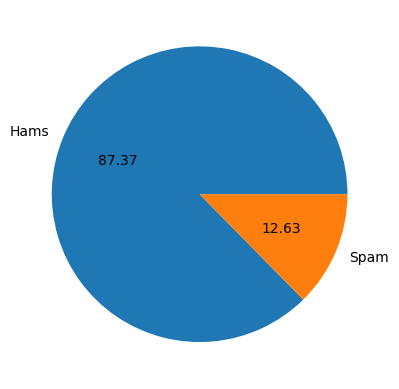

In [252]:
import matplotlib.pyplot as plt
plt.pie(file['target'].value_counts(), labels=['Hams','Spam'],autopct="%0.2f")
plt.show()

In [253]:
import nltk
nltk.download('all')
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus = []

file['num_characters'] = file['text'].apply(len)

file.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]    | 

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [254]:
# nltk.download('punkt')
file['num_words'] = file['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
file.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [255]:
file['num_sentences'] = file['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
file.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [256]:
file[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,1.965564
std,58.236293,1.448541,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,60.000000,1.000000,1.000000
75%,117.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [257]:
# ham
file[file['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,1.820195
std,56.358207,1.383657,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000
50%,52.000000,1.000000,1.000000
75%,90.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [258]:
# spam
file[file['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,2.970904
std,30.137753,1.488425,1.488425
min,13.000000,1.000000,1.000000
25%,132.000000,2.000000,2.000000
50%,149.000000,3.000000,3.000000
75%,157.000000,4.000000,4.000000
max,224.000000,9.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

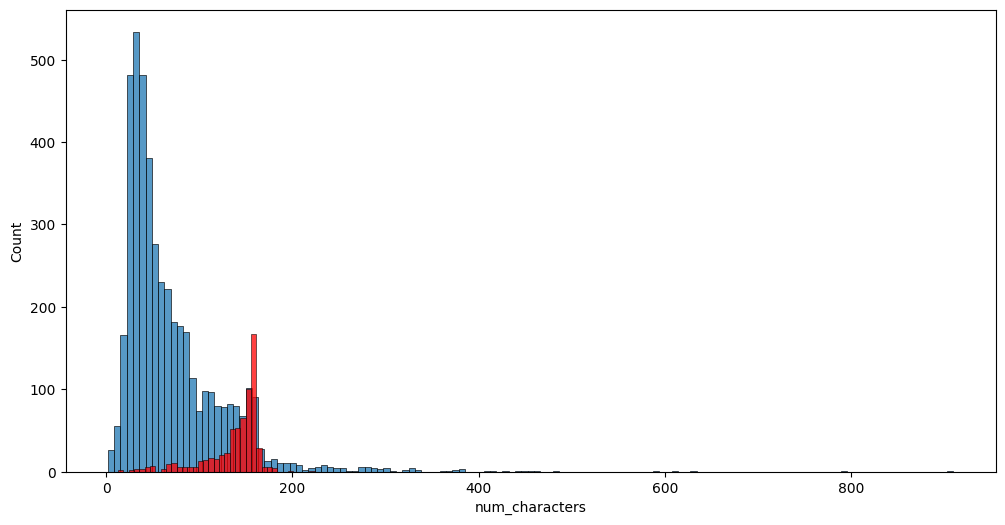

In [259]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(file[file['target']==0]['num_characters'])
sns.histplot(file[file['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

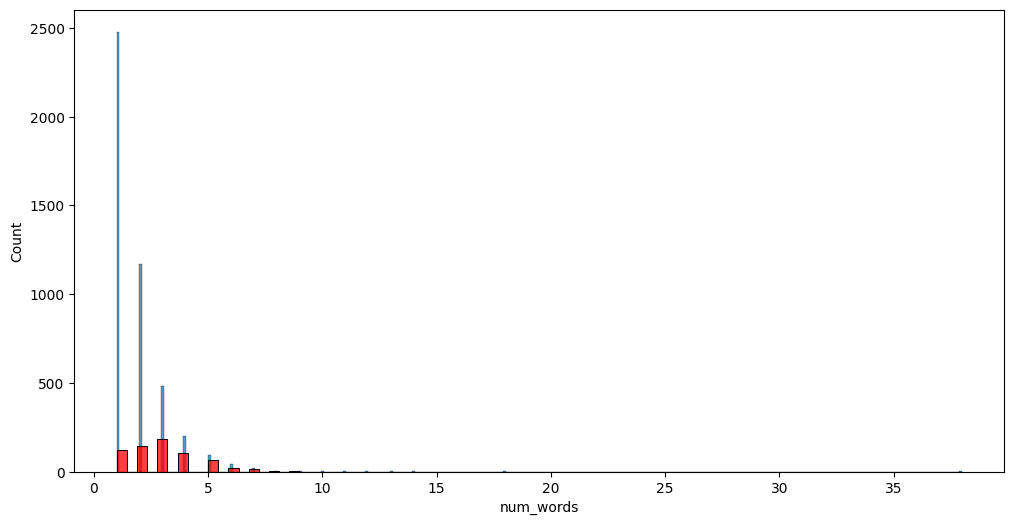

In [260]:
plt.figure(figsize=(12,6))
sns.histplot(file[file['target'] == 0]['num_words'])
sns.histplot(file[file['target']==1]['num_words'],color='red')

c:\Users\agraw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


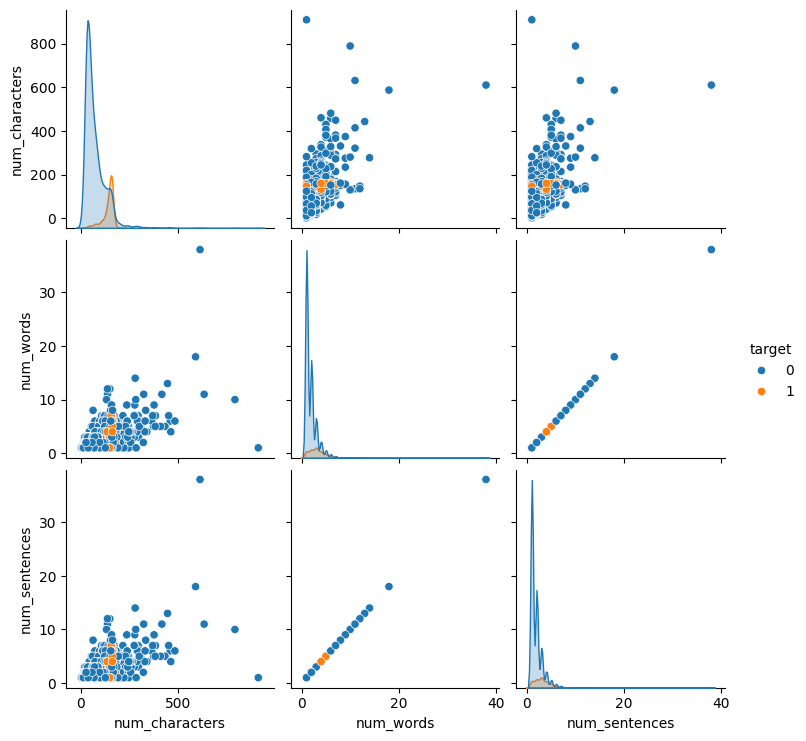

In [261]:
sns.pairplot(file,hue='target')

<Axes: >

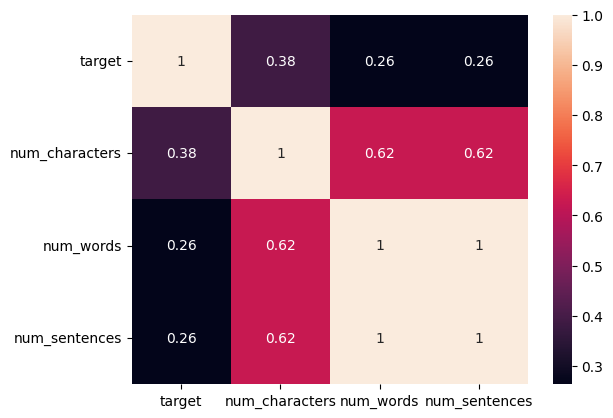

In [262]:
# Select only the numeric columns for correlation
numeric_cols = file.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix,annot=True)


In [263]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    import string
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transform_text("I'm gonna be home soon and i don't wnat to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon wnat talk stuff anymor tonight k cri enough today'

In [264]:
file['text'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [265]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [266]:
file['transformed_text'] = file['text'].apply(transform_text)
file.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [267]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


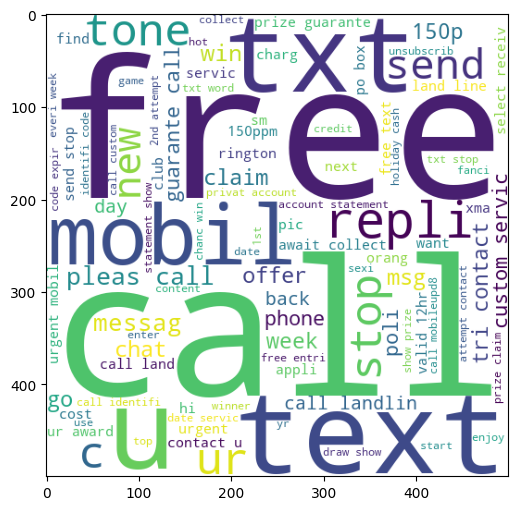

In [268]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(file[file['target']==1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

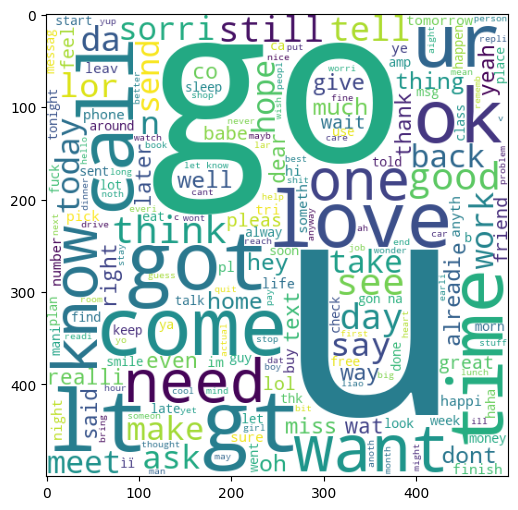

In [269]:
ham_wc = wc.generate(file[file['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [270]:
file.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [271]:
spam_corpus = []
for msg in file[file['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

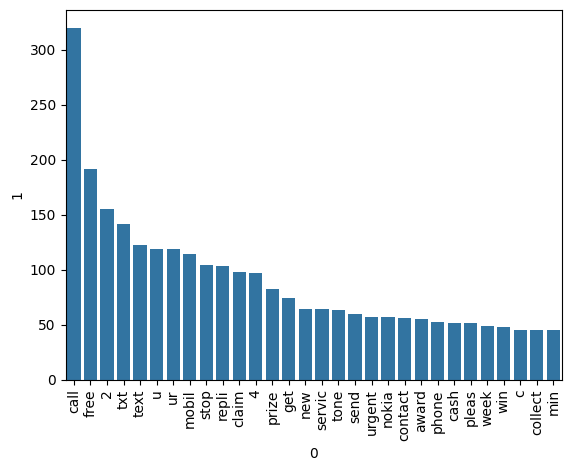

In [272]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [273]:
ham_corpus=[]
for msg in file[file['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

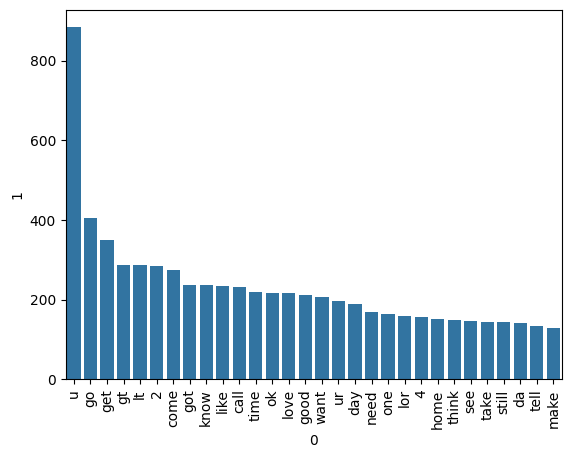

In [274]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [275]:
file.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [276]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(file['transformed_text']).toarray()

X.shape

(5169, 3000)

In [277]:
y = file['target'].values

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
